In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

data = pd.read_csv("RNA_Database.csv")
data.head()

,Number of Motifs,Clashes,Geometry,E-density
0,1,21.14,28.57,0.0
1,5,0.00,0.00,0.0
2,10,3.22,1.85,3.7
3,1,0.00,19.15,0.0
4,639,0.00,19.15,0.0


In [42]:
data.shape

(4645, 4)

In [43]:
data.describe()

,Number of Motifs,Clashes,Geometry,E-density
count,4645.000000,4645.000000,4645.000000,4645.000000
mean,137.967492,15.834263,19.894618,2.565994
std,311.298945,23.678395,17.582423,9.659155
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.650000,6.560000,0.000000
50%,6.000000,8.160000,17.390000,0.000000
75%,30.000000,17.960000,27.360000,0.330000
max,1514.000000,354.840000,226.840000,100.000000


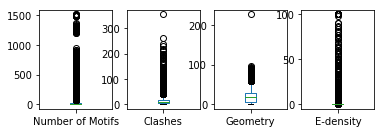

In [44]:
# box and whisker plots
data.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False)
plt.show()

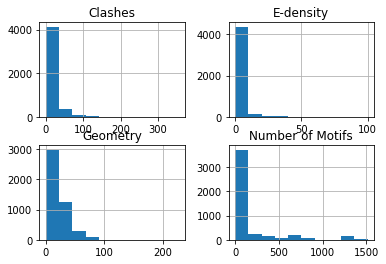

In [45]:
data.hist()
plt.show()

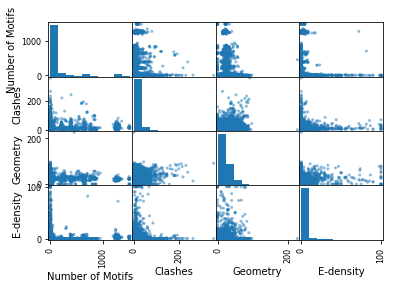

In [46]:
scatter_matrix(data)
plt.show()

In [47]:
data1 = data
data1.head().T

,0,1,2,3,4
Number of Motifs,1.00,5.0,10.00,1.00,639.00
Clashes,21.14,0.0,3.22,0.00,0.00
Geometry,28.57,0.0,1.85,19.15,19.15
E-density,0.00,0.0,3.70,0.00,0.00


In [48]:
data1.describe()

,Number of Motifs,Clashes,Geometry,E-density
count,4645.000000,4645.000000,4645.000000,4645.000000
mean,137.967492,15.834263,19.894618,2.565994
std,311.298945,23.678395,17.582423,9.659155
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.650000,6.560000,0.000000
50%,6.000000,8.160000,17.390000,0.000000
75%,30.000000,17.960000,27.360000,0.330000
max,1514.000000,354.840000,226.840000,100.000000


In [49]:
from sklearn import preprocessing
data1_standardized = preprocessing.scale(data1)
data1_standardized = pd.DataFrame(data1_standardized)

/home/satyam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


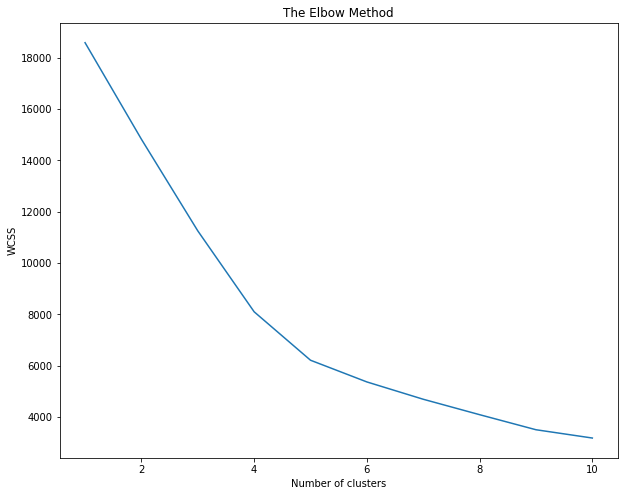

In [50]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data1_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [51]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data1_standardized)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
data1['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(data1.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Number of Motifs,Clashes,Geometry,E-density
cluster,,,,
1,913.5,13.3,20.0,1.2
2,32.3,9.4,10.1,1.1
3,46.7,16.2,40.3,2.6
4,110.0,95.1,37.7,0.9
5,28.3,15.3,23.6,62.2


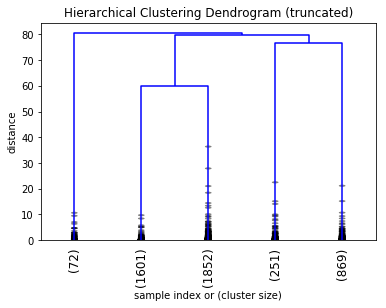

In [52]:
# Hierarchical clustering for the same dataset
# creating a dataset for hierarchical clustering
data2_standardized = data1_standardized
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
#creating the linkage matrix
H_cluster = linkage(data2_standardized,'ward')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

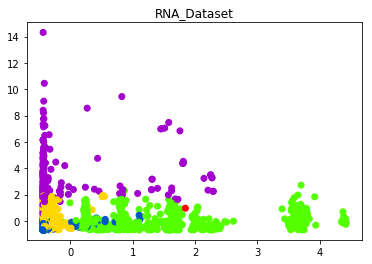

In [53]:
# Assigning the clusters and plotting the observations as per hierarchical clustering
from scipy.cluster.hierarchy import fcluster
k=5
cluster_2 = fcluster(H_cluster, k, criterion='maxclust')
cluster_2[0:30:,]
#plt.figure(figsize=(10, 8))
plt.scatter(data2_standardized.iloc[:,0], data2_standardized.iloc[:,1],c=cluster_2, cmap='prism')  # plot points with cluster dependent colors
plt.title('RNA_Dataset')
plt.show()

In [54]:
# New Dataframe called cluster
cluster_Hierarchical = pd.DataFrame(cluster_2)
# Adding the hierarchical clustering to dataset
data2=data1
data2['cluster'] = cluster_Hierarchical
data2.head()

,Number of Motifs,Clashes,Geometry,E-density,cluster
0,1,21.14,28.57,0.0,3
1,5,0.00,0.00,0.0,2
2,10,3.22,1.85,3.7,2
3,1,0.00,19.15,0.0,3
4,639,0.00,19.15,0.0,5


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import csv

RNA = list(csv.reader(open("RNA_Database.csv")))
x = RNA.Clashes
y = data2.Geometry

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
scores = {}
scores_list = []
krange = range(1,26)

for k in krange:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(krange, scores_list)
plt.xlabel("value of k for knn")
plt.ylabel("testing accuracy")
plt.show()

AttributeError: 'list' object has no attribute 'Clashes'